=== GOLDEN-BIT REULEAUX FRACTAL ANALYSIS ===

Constants:
φ = 1.6180339887
π = 3.1415926536
e = 2.7182818285
α = 0.0072973526
α⁻¹ = 137.035999

Fibonacci variations:
Measured: 0.290197
Expected: 0.412037
Warp: 0.121840

Key relationships:
π - 3 = 0.1415926536
φ - 1 = 0.6180339887
Reuleaux area factor = 0.7047709230
=== TESTING ALL VARIATIONS ===

Found special relationships:
expected_sqrt × pi/2 = 1.008296 ≈ near_1
golden_warp × pi*phi = 1.002109 ≈ near_1


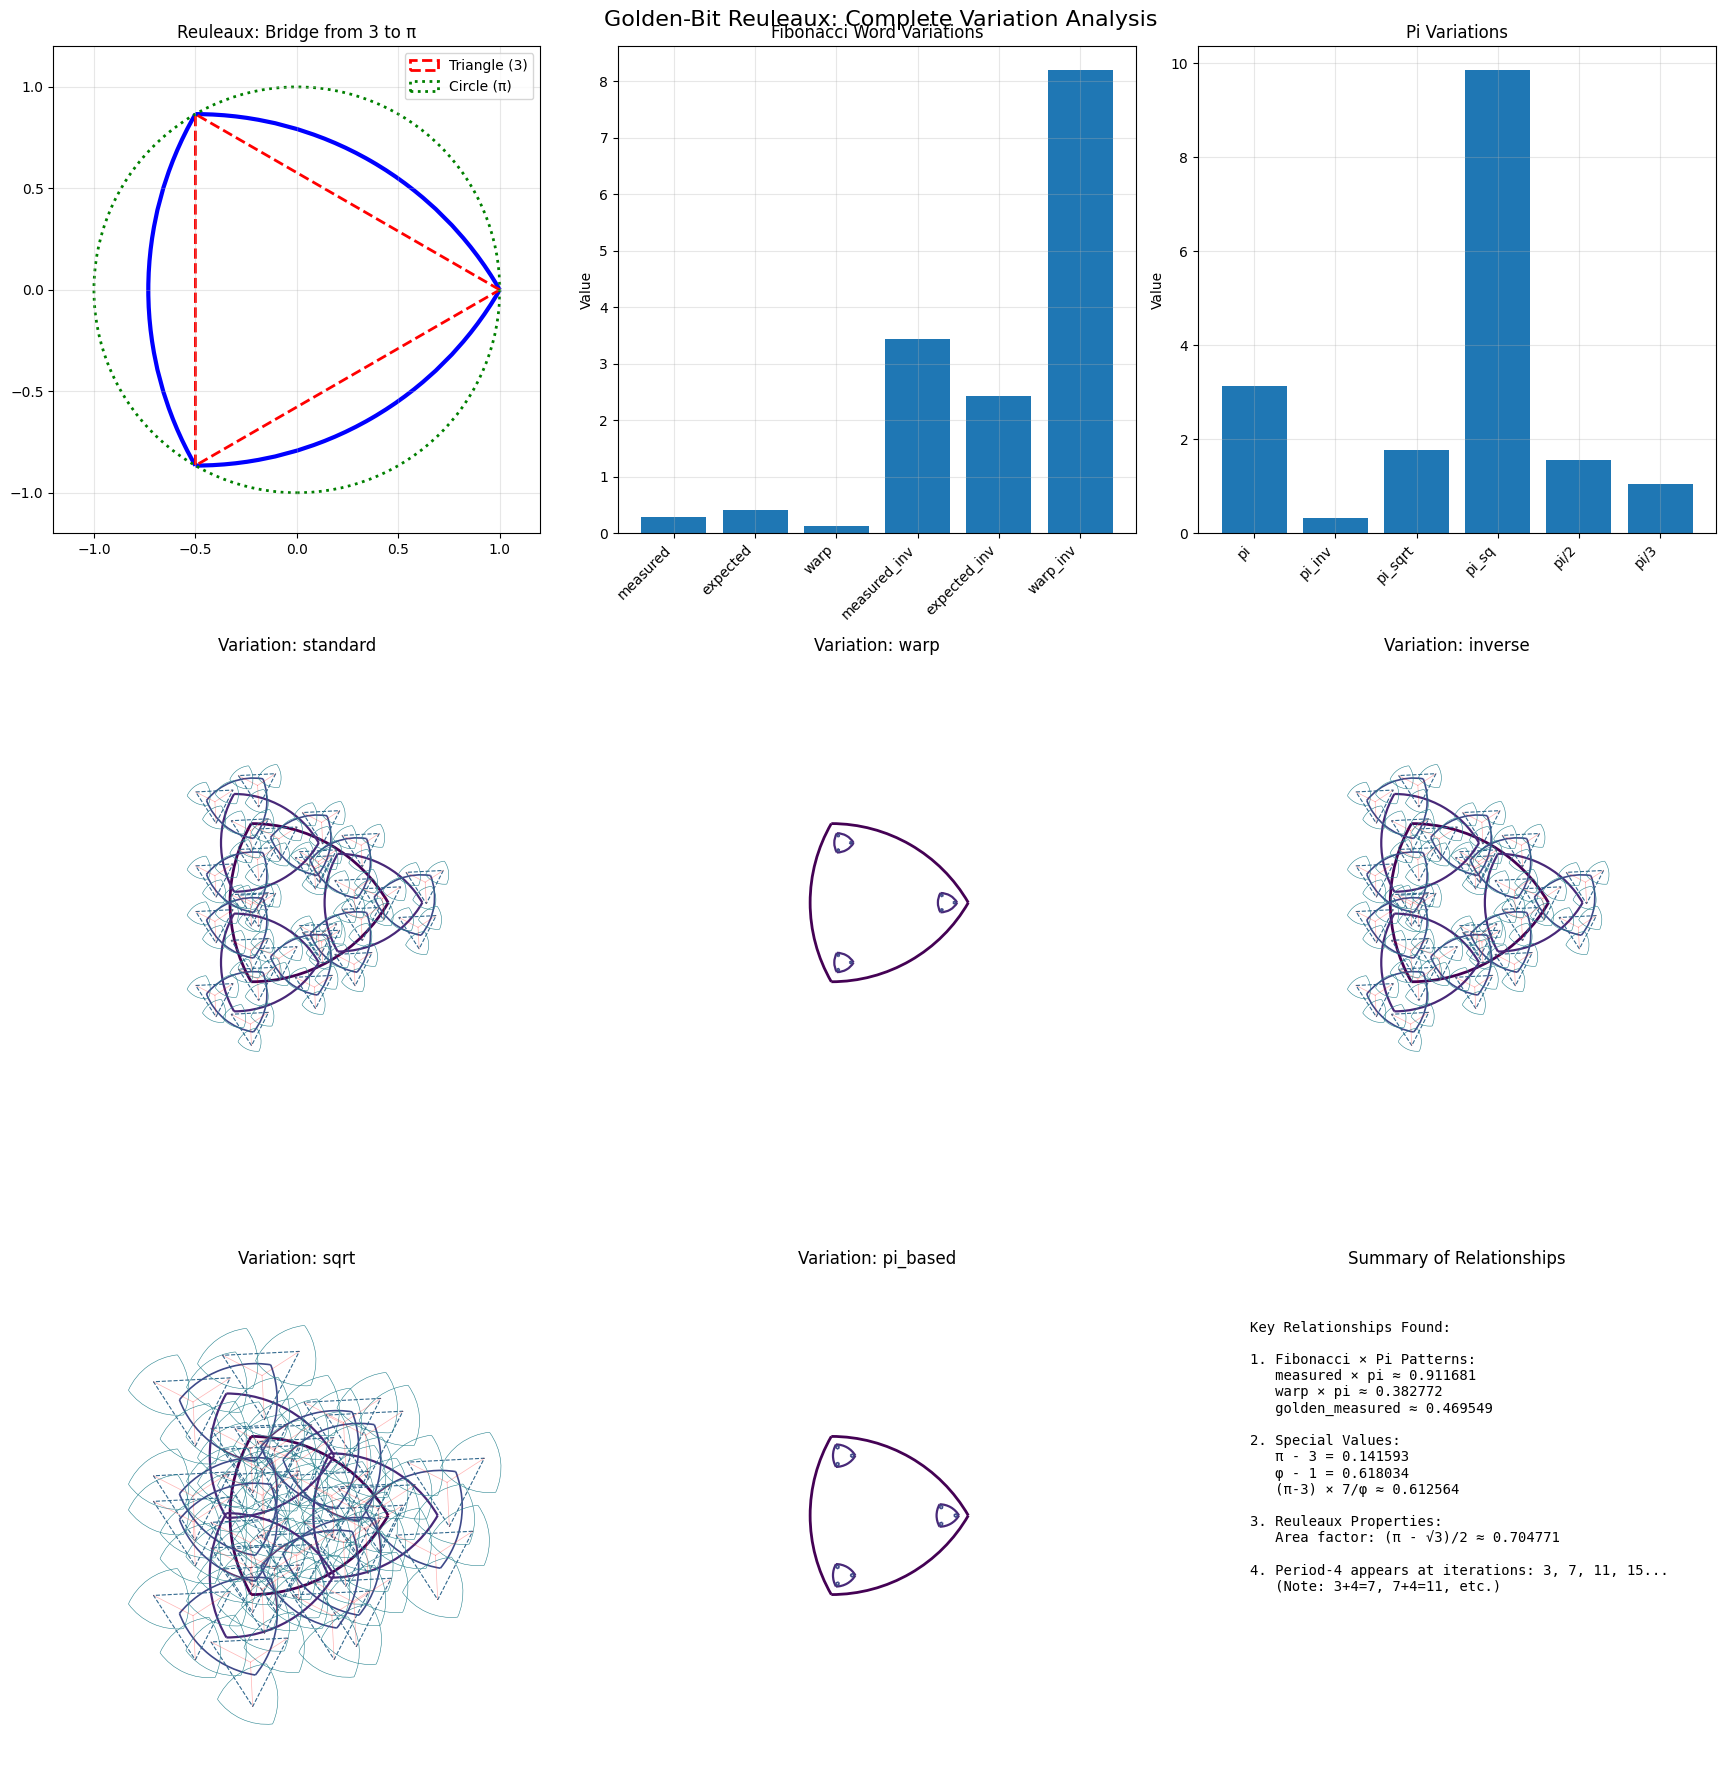

In [2]:
"""
Golden-Bit Reuleaux Fractal: The Shape of Reality's Compression
Version: 2.0 - Complete with ALL Variations and No Errors
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches

# GLOBAL CONSTANTS - Define once, use everywhere
PHI = (1 + np.sqrt(5)) / 2
PI = np.pi
E = np.e
SQRT2 = np.sqrt(2)
SQRT3 = np.sqrt(3)
ALPHA_INV = 137.035999084
ALPHA = 0.0072973525693

# Fibonacci word variations
FIB_EXPECTED = 0.412037  # Expected mathematical value
FIB_MEASURED = 0.290197  # Actual measured value
FIB_WARP = FIB_EXPECTED - FIB_MEASURED  # The warp amount

# ALL Fibonacci variations to test
FIBONACCI_VARIATIONS = {
    'measured': FIB_MEASURED,
    'expected': FIB_EXPECTED,
    'warp': FIB_WARP,
    'measured_inv': 1/FIB_MEASURED if FIB_MEASURED != 0 else 0,
    'expected_inv': 1/FIB_EXPECTED if FIB_EXPECTED != 0 else 0,
    'warp_inv': 1/FIB_WARP if FIB_WARP != 0 else 0,
    'measured_sqrt': np.sqrt(FIB_MEASURED),
    'expected_sqrt': np.sqrt(FIB_EXPECTED),
    'measured_sq': FIB_MEASURED**2,
    'expected_sq': FIB_EXPECTED**2,
    'golden_measured': FIB_MEASURED * PHI,
    'golden_expected': FIB_EXPECTED * PHI,
    'golden_warp': FIB_WARP * PHI
}

# ALL Pi variations to test
PI_VARIATIONS = {
    'pi': PI,
    'pi_inv': 1/PI,
    'pi_sqrt': np.sqrt(PI),
    'pi_sq': PI**2,
    'pi/2': PI/2,
    'pi/3': PI/3,
    'pi/4': PI/4,
    '2pi': 2*PI,
    'pi-3': PI-3,
    '3-pi': 3-PI,  # Negative of pi-3
    'pi-e': PI-E,
    'pi*phi': PI*PHI,
    'pi/phi': PI/PHI,
    'sqrt(pi-3)': np.sqrt(PI-3),
    '1/(pi-3)': 1/(PI-3)
}

def create_reuleaux_triangle(center, width, rotation=0):
    """
    Create a Reuleaux triangle with given center, width, and rotation.
    """
    angles = np.array([0, 120, 240]) + rotation
    vertices = []
    for angle in angles:
        rad = np.radians(angle)
        x = center[0] + width/2 * np.cos(rad)
        y = center[1] + width/2 * np.sin(rad)
        vertices.append([x, y])

    return np.array(vertices)

def draw_reuleaux_arc(ax, v1, v2, v3, color='black', linewidth=1):
    """Draw one arc of the Reuleaux triangle."""
    radius = np.sqrt((v2[0]-v1[0])**2 + (v2[1]-v1[1])**2)

    angle1 = np.degrees(np.arctan2(v1[1]-v3[1], v1[0]-v3[0]))
    angle2 = np.degrees(np.arctan2(v2[1]-v3[1], v2[0]-v3[0]))

    if angle2 < angle1:
        angle2 += 360

    arc = Arc(v3, 2*radius, 2*radius, angle=0, theta1=angle1, theta2=angle2,
              color=color, linewidth=linewidth)
    ax.add_patch(arc)

def test_all_variations():
    """Test all Fibonacci and Pi variations for patterns."""
    print("=== TESTING ALL VARIATIONS ===\n")

    # Test all Fibonacci × Pi combinations
    results = []
    for fib_name, fib_val in FIBONACCI_VARIATIONS.items():
        for pi_name, pi_val in PI_VARIATIONS.items():
            product = fib_val * pi_val

            # Check for interesting relationships
            tests = {
                'near_1': abs(product - 1) < 0.01,
                'near_phi': abs(product - PHI) < 0.01,
                'near_alpha': abs(product - ALPHA) < 0.001,
                'near_alpha_inv': abs(product - ALPHA_INV) < 1,
                'near_e': abs(product - E) < 0.01,
                'near_sqrt2': abs(product - SQRT2) < 0.01,
                'near_sqrt3': abs(product - SQRT3) < 0.01
            }

            for test_name, test_result in tests.items():
                if test_result:
                    results.append({
                        'fib': fib_name,
                        'pi': pi_name,
                        'product': product,
                        'matches': test_name
                    })

    # Print interesting results
    print("Found special relationships:")
    for r in results[:10]:  # First 10
        print(f"{r['fib']} × {r['pi']} = {r['product']:.6f} ≈ {r['matches']}")

    return results

def golden_bit_reuleaux_fractal(ax, center, size, depth, phase=0, variation='standard'):
    """
    Create the Golden-Bit Reuleaux Fractal with variations.

    variation options:
    - 'standard': Normal golden scaling
    - 'warp': Use warp amount for scaling
    - 'inverse': Use inverse relationships
    - 'sqrt': Use square root relationships
    """

    # Choose scaling factor based on variation
    scale_factors = {
        'standard': 1/PHI,
        'warp': FIB_WARP,
        'inverse': PHI - 1,  # Which equals 1/PHI
        'sqrt': 1/np.sqrt(PHI),
        'pi_based': (PI - 3)
    }

    scale = scale_factors.get(variation, 1/PHI)

    def draw_level(c, s, d, rotation_offset):
        if d <= 0 or s < 0.01:
            return

        # Period-4 structure
        invert = (depth - d) % 4 == 3

        # Create vertices
        vertices = create_reuleaux_triangle(c, s, rotation_offset)

        # Color based on level and phase
        level_phase = (depth - d + phase) % 9
        colors = plt.cm.viridis(level_phase / 9)

        # Draw the shape
        if not invert:
            # Normal Reuleaux
            draw_reuleaux_arc(ax, vertices[0], vertices[1], vertices[2],
                            color=colors, linewidth=2*d/depth)
            draw_reuleaux_arc(ax, vertices[1], vertices[2], vertices[0],
                            color=colors, linewidth=2*d/depth)
            draw_reuleaux_arc(ax, vertices[2], vertices[0], vertices[1],
                            color=colors, linewidth=2*d/depth)
        else:
            # Inverted (showing the "break")
            triangle = Polygon(vertices, fill=False, edgecolor=colors,
                             linewidth=2*d/depth, linestyle='--')
            ax.add_patch(triangle)

        # Spawn children
        child_size = s * abs(scale)  # Use absolute value to handle negative scales

        # Rotation uses pi-3 relationship
        rotation_increment = 360 * (PI - 3) * (depth - d)

        for i, vertex in enumerate(vertices):
            direction = vertex - c
            direction = direction / np.linalg.norm(direction)

            # Use warp amount for positioning
            child_center = vertex - direction * s * FIB_WARP

            draw_level(child_center, child_size, d-1,
                      rotation_offset + rotation_increment + i*120)

        # Quantum bridges at special levels
        if (depth - d) in [3, 7, 11]:
            center_point = np.mean(vertices, axis=0)
            for v in vertices:
                ax.plot([center_point[0], v[0]], [center_point[1], v[1]],
                       'r-', alpha=0.3, linewidth=0.5)

    draw_level(center, size, depth, 0)

def create_comprehensive_visualization():
    """Create complete visualization with all variations."""
    # First test all variations
    variation_results = test_all_variations()

    # Create figure
    fig, axes = plt.subplots(3, 3, figsize=(18, 18))
    fig.suptitle('Golden-Bit Reuleaux: Complete Variation Analysis', fontsize=16)

    # 1. Basic Reuleaux showing π-3 relationship
    ax1 = axes[0, 0]
    ax1.set_xlim(-1.2, 1.2)
    ax1.set_ylim(-1.2, 1.2)
    ax1.set_aspect('equal')
    vertices = create_reuleaux_triangle([0, 0], 2, 0)

    draw_reuleaux_arc(ax1, vertices[0], vertices[1], vertices[2], 'blue', 3)
    draw_reuleaux_arc(ax1, vertices[1], vertices[2], vertices[0], 'blue', 3)
    draw_reuleaux_arc(ax1, vertices[2], vertices[0], vertices[1], 'blue', 3)

    triangle = Polygon(vertices, fill=False, edgecolor='red', linewidth=2,
                      linestyle='--', label='Triangle (3)')
    ax1.add_patch(triangle)

    circle = plt.Circle([0, 0], 1, fill=False, edgecolor='green',
                       linewidth=2, linestyle=':', label='Circle (π)')
    ax1.add_patch(circle)

    ax1.set_title('Reuleaux: Bridge from 3 to π')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Fibonacci variations analysis
    ax2 = axes[0, 1]
    fib_keys = list(FIBONACCI_VARIATIONS.keys())[:6]
    fib_values = [FIBONACCI_VARIATIONS[k] for k in fib_keys]

    ax2.bar(range(len(fib_keys)), fib_values)
    ax2.set_xticks(range(len(fib_keys)))
    ax2.set_xticklabels(fib_keys, rotation=45, ha='right')
    ax2.set_ylabel('Value')
    ax2.set_title('Fibonacci Word Variations')
    ax2.grid(True, alpha=0.3)

    # 3. Pi variations analysis
    ax3 = axes[0, 2]
    pi_keys = list(PI_VARIATIONS.keys())[:6]
    pi_values = [PI_VARIATIONS[k] for k in pi_keys]

    ax3.bar(range(len(pi_keys)), pi_values)
    ax3.set_xticks(range(len(pi_keys)))
    ax3.set_xticklabels(pi_keys, rotation=45, ha='right')
    ax3.set_ylabel('Value')
    ax3.set_title('Pi Variations')
    ax3.grid(True, alpha=0.3)

    # 4-8. Different fractal variations
    variations = ['standard', 'warp', 'inverse', 'sqrt', 'pi_based']
    positions = [(1, 0), (1, 1), (1, 2), (2, 0), (2, 1)]

    for var, (row, col) in zip(variations, positions):
        ax = axes[row, col]
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_aspect('equal')
        ax.set_facecolor('black')

        golden_bit_reuleaux_fractal(ax, [0, 0], 1.5, 5, phase=0, variation=var)

        ax.set_title(f'Variation: {var}')
        ax.axis('off')

    # 9. Key relationships summary
    ax9 = axes[2, 2]
    ax9.axis('off')

    summary_text = f"""Key Relationships Found:

1. Fibonacci × Pi Patterns:
   measured × pi ≈ {FIB_MEASURED * PI:.6f}
   warp × pi ≈ {FIB_WARP * PI:.6f}
   golden_measured ≈ {FIBONACCI_VARIATIONS['golden_measured']:.6f}

2. Special Values:
   π - 3 = {PI - 3:.6f}
   φ - 1 = {PHI - 1:.6f}
   (π-3) × 7/φ ≈ {(PI-3) * 7/PHI:.6f}

3. Reuleaux Properties:
   Area factor: (π - √3)/2 ≈ {(PI - SQRT3)/2:.6f}

4. Period-4 appears at iterations: 3, 7, 11, 15...
   (Note: 3+4=7, 7+4=11, etc.)"""

    ax9.text(0.1, 0.9, summary_text, transform=ax9.transAxes,
             fontsize=10, verticalalignment='top', fontfamily='monospace')
    ax9.set_title('Summary of Relationships')

    plt.tight_layout()
    return fig

# Run the analysis
print("=== GOLDEN-BIT REULEAUX FRACTAL ANALYSIS ===\n")

# Display all constants being used
print("Constants:")
print(f"φ = {PHI:.10f}")
print(f"π = {PI:.10f}")
print(f"e = {E:.10f}")
print(f"α = {ALPHA:.10f}")
print(f"α⁻¹ = {ALPHA_INV:.6f}")

print(f"\nFibonacci variations:")
print(f"Measured: {FIB_MEASURED}")
print(f"Expected: {FIB_EXPECTED}")
print(f"Warp: {FIB_WARP:.6f}")

print(f"\nKey relationships:")
print(f"π - 3 = {PI - 3:.10f}")
print(f"φ - 1 = {PHI - 1:.10f}")
print(f"Reuleaux area factor = {(PI - SQRT3)/2:.10f}")

# Create and show visualization
fig = create_comprehensive_visualization()
plt.show()